<a href="https://colab.research.google.com/github/DaniloRiver/202101607-2022-1P-BD2/blob/main/AnalisisSentimiento_Embedding%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Sentimiento con Embedding + CNN

> Jose Danilo Rivera




# Conjunto de datos de reseñas de películas

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
import string
import re

def load_documento(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

def clean_documento(doc):
    tokens = doc.split()
    re_punc = re.compile('[%s]'%re.escape(string.punctuation))
    tokens = [re_punc.sub('',w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word)>1]
    return tokens

filename = '/content/drive/MyDrive/data/pos/cv000_29590.txt'
text = load_documento(filename)
tokens = clean_documento(text)
print(tokens)

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anythi

\

#Definir un Vocabulario

In [ ]:
from os import listdir
from collections import Counter

def add_doc_to_vocab(filename, vocab):
    doc = load_documento(filename)
    tokens = clean_documento(doc)
    vocab.update(tokens)

def process_docs(directory, vocab):
    for filename in listdir(directory):
        if filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        add_doc_to_vocab(path,vocab)

vocab = Counter()
process_docs('/content/drive/MyDrive/data/pos',vocab)
process_docs('/content/drive/MyDrive/data/neg',vocab)

print(len(vocab))
print()
print(vocab.most_common(50))

44276

[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


Reducir palabras con menos ocurrencias

In [ ]:
min_ocurr = 2
tokens = [k for k,c in vocab.items() if c>=min_ocurr]
print(len(tokens))

25767


In [ ]:
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [ ]:
save_list(tokens,'vocab.txt')

In [ ]:
archivo = open("vocab.txt")
print(archivo.read())

films
adapted
comic
books
plenty
success
whether
theyre
superheroes
batman
superman
spawn
geared
toward
kids
casper
arthouse
crowd
ghost
world
theres
never
really
book
like
hell
starters
created
alan
moore
eddie
campbell
brought
medium
whole
new
level
mid
series
called
say
thoroughly
subject
jack
ripper
would
saying
michael
jackson
starting
look
little
odd
graphic
novel
pages
long
includes
nearly
consist
nothing
footnotes
words
dont
dismiss
film
source
get
past
thing
might
find
another
stumbling
block
hells
directors
albert
allen
hughes
getting
brothers
direct
seems
almost
ludicrous
casting
carrot
top
well
anything
better
thats
set
ghetto
features
violent
street
crime
mad
geniuses
behind
menace
ii
society
question
course
whitechapel
londons
east
end
filthy
place
whores
unfortunates
nervous
mysterious
psychopath
carving
profession
surgical
precision
first
stiff
turns
copper
peter
robbie
coltrane
enough
calls
inspector
frederick
abberline
johnny
depp
blow
crack
case
widower
prophetic
dre

#Entrenar CNN con capa Embedding

In [ ]:
#!pip install --upgrade tensorflow
#!pip install --upgrade keras



In [ ]:
import re
import numpy as np
from os import listdir
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D


def load_documento(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

vocab_filename = 'vocab.txt'
vocab = load_documento(vocab_filename)
vocab = set(vocab.split())

limpiamos el documento que implica dividir cada revision en funcion de los espacios en blanco, eliminar la puntuacion y luego filtrar todos los tokens que no estan en el vocabulario.

In [ ]:
def clean_documento(doc, vocab):
    tokens = doc.split()
    re_punc = re.compile('[%s]'%re.escape(string.punctuation))
    tokens = [re_punc.sub('',w) for w in tokens]
    tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens

Actualizamos process_doc(), para que pueda llamar a la funcion clean_doc(), para cada documento en el directorio determinado.

In [ ]:
def process_docs(directory, vocab, is_train):
    documents = list()
    for filename in listdir(directory):
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        doc = load_documento(path)
        tokens = clean_documento(doc, vocab)
        documents.append(tokens)
    return documents

Se puede llamar la funcion process_docs() para los directorios neg y pos y combinar las revisiones en un solo train o test.

La funcion load_clean_dataset() a continuacion cargara todas las revisiones y preparara las etiquetas de clase para el conjunto de datos train/test

In [ ]:
import numpy as np
def load_clean_dataset(vocab, is_train):
    neg = process_docs('/content/drive/MyDrive/data/neg', vocab, is_train)
    pos = process_docs('/content/drive/MyDrive/data/pos', vocab, is_train)
    docs = neg + pos
    labels = np.array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels

In [ ]:
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
train_docs, ytrain = load_clean_dataset(vocab, True)
# Calcular la secuencia máxima
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)

Maximum length: 1317


Luego podemos usar la longitud maxima como un parametro para una funcion para codigicar enteros y rellenar secuencias.

In [ ]:
def encode_docs(tokenizer, max_length, docs):
    # Codificar a entero
    encoded = tokenizer.texts_to_sequences(docs)
    # rellenar secuencias
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

Empezar la Red Neuronal

In [ ]:
# Cargar datos de entrenamiento
train_docs, ytrain = load_clean_dataset(vocab,True)
# Crear el Tokenizer
tokenizer = create_tokenizer(train_docs)
# Definir el tamaño de vocabulario
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

Vocabulary size: 25768








*   List item

1.   Usaremos un espacio vectorial de 100 dimensiones, pero puede probar otros valores, como 50 o 150.
La longitud máxima del documento se calculó anteriormente.
2.   Definirmos nuestro modelo, incluida la capa Embedding.
Se utiliza una configuraci￳n CNN conservadora con 32 filtros (campos paralelos para procesar palabras), un tama￱o de kernel de 8 y ReLU.
Definimos capa de MaxPooling.
3. Aplanamos en un vector las caracter￭sticas extra￭das por CNN.
4. Definimos una capa Densa con ReLU.
5. La capa de salida utiliza Sigmoide para generar un valor entre 0 (negativo) y 1 (positivo).


*   List item



In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2




def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 150, input_length=max_length))

    model.add(Conv1D(32, 10, activation='relu'))
    model.add(MaxPooling1D())

    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compilacion
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model



In [ ]:
model = define_model(vocab_size, max_length)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1317, 150)         3865200   
                                                                 
 conv1d (Conv1D)             (None, 1308, 32)          48032     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 654, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20928)             0         
                                                                 
 dense (Dense)               (None, 10)                209290    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

In [ ]:
import hashlib


train_docs, ytrain = load_clean_dataset(vocab, True)
# Creamos el Tokenizer
tokenizer = create_tokenizer(train_docs)
# Definimos el vocabulario
vocab_size = len(tokenizer.word_index) + 1
print('Tamaño del vocabulario: %d' % vocab_size)
# Calculamos la máxima secuencia
max_length = max([len(s.split()) for s in train_docs])
print('Longitud máxima: %d' % max_length)
# Codificamos los datos
Xtrain = encode_docs(tokenizer, max_length, train_docs)
# Definimos el modelo
model = define_model(vocab_size, max_length)
# Hacemos el fit
model.fit(Xtrain, ytrain, epochs=15, verbose=1)


Tamaño del vocabulario: 25768
Longitud máxima: 1317
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1317, 150)         3865200   
                                                                 
 conv1d_1 (Conv1D)           (None, 1308, 32)          48032     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 654, 32)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20928)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                209290    
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
  

In [ ]:
# from IPython.lib.security import encode
# train_docs, ytrain = load_clean_dataset(vocab, True)
# # Creamos el Tokenizer
# tokenizer = create_tokenizer(train_docs)
# # Definimos el vocabulario
# vocab_size = len(tokenizer.word_index)+1
# print('Tamaño del vocabulario: %d' % vocab_size)
# # Calculamos la máxima secuencia
# max_length = max([len(s.split()) for s in train_docs])
# print('Longitud máxima: %d' % max_length)
# # Codificamos los datos
# Xtrain = encode_docs(tokenizer, max_length, train_docs)
# Xtrain = np.expand_dims(Xtrain, axis=1)
# # Definimos el modelo
# model = define_model(vocab_size,max_length)
# # Hacemos el fit
# model.fit(Xtrain, ytrain, epochs=10, verbose=1)

In [ ]:
# save the model
model.save('model.h5')

#Evaluar el Modelo

In [ ]:
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)

tokenizer = create_tokenizer(train_docs)
vocab_size = len(tokenizer.word_index) + 1
print('Tamaño del vocabulario: %d' % vocab_size)

max_length = max([len(s.split()) for s in train_docs])
print('Longitud máxima: %d' % max_length)
Xtrain = encode_docs(tokenizer, max_length, train_docs)
Xtest = encode_docs(tokenizer,max_length,test_docs)

Tamaño del vocabulario: 25768
Longitud máxima: 1317


In [ ]:
def predict_sentiment(review, vocab, tokenizer, max_length, model):
    line = clean_documento(review, vocab)
    # Codificar y rellenar
    padded = encode_docs(tokenizer, max_length, [line])
    # Predecir la reseña
    yhat = model.predict(padded, verbose=1)
    print(round(yhat[0,0]))
    # Extraer el porcentaje de la reseña dado
    porcentaje = yhat[0,0]
    print(porcentaje)
    if round(porcentaje) == 1:  # Cambiar el valor redondeado para clasificación
        return porcentaje, 'POSITIVO'
    return (1 - porcentaje), 'NEGATIVO'

In [ ]:
text_pos = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text_pos, vocab, tokenizer,max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text_pos, sentiment, percent*100))

text_neg = 'This is a bad movie. Do not watch it. It sucks.'
percent, sentiment = predict_sentiment(text_neg, vocab, tokenizer,max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text_neg, sentiment, percent*100))


1/1 [==============================] - 0s 248ms/step
1
0.50913846
Review: [Best movie ever! It was great, I recommend it.]
Sentiment: POSITIVO (50.914%)
1/1 [==============================] - 0s 29ms/step
0
0.4561702
Review: [This is a bad movie. Do not watch it. It sucks.]
Sentiment: NEGATIVO (54.383%)


In [ ]:
text_pos = "The films is very good and visual effects are impressive. like very much good"
percent, sentiment = predict_sentiment(text_pos, vocab, tokenizer,max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text_pos, sentiment, percent*100))

text_neg = "I can't believe I wasted time watching this movie,  boring."
percent, sentiment = predict_sentiment(text_neg, vocab, tokenizer,max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text_neg, sentiment, percent*100))

1/1 [==============================] - 0s 18ms/step
1
0.5133145
Review: [The films is very good and visual effects are impressive. like very much good]
Sentiment: POSITIVO (51.331%)
1/1 [==============================] - 0s 17ms/step
0
0.37735543
Review: [I can't believe I wasted time watching this movie,  boring.]
Sentiment: NEGATIVO (62.264%)


In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Cargamos el modelo entrenado desde 'model.h5'
model = load_model('model.h5')

# Evaluamos en el conjunto de entrenamiento (Xtrain, ytrain)
_, train_accuracy = model.evaluate(Xtrain, ytrain, verbose=1)
print('Accuracy en Train: %.2f' % (train_accuracy * 100))

# Evaluamos en el conjunto de prueba (Xtest, ytest)
_, test_accuracy = model.evaluate(Xtest, ytest, verbose=1)
print('Accuracy en Test: %.2f' % (test_accuracy * 100))

# Realizamos predicciones en el conjunto de prueba (Xtest)
y_pred_prob = model.predict(Xtest)
y_pred = (y_pred_prob > 0.5).astype(int)  # Aplicamos un umbral de 0.5 para obtener clases

# Calcular métricas
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
confusion = confusion_matrix(ytest, y_pred)

# Mostrar las métricas adicionales
print('\nMétricas Adicionales en Test:')
print('Precisión (Precision): %.2f' % (precision * 100))
print('Recuperación (Recall): %.2f' % (recall * 100))
print('Puntuación F1 (F1 Score): %.2f' % (f1 * 100))

# Mostrar la matriz de confusión
print('Matriz de Confusión:')
print(confusion)


57/57 [==============================] - 1s 5ms/step - loss: 2.2500e-04 - accuracy: 1.0000
Accuracy en Train: 100.00
7/7 [==============================] - 0s 5ms/step - loss: 0.3617 - accuracy: 0.8700
Accuracy en Test: 87.00
7/7 [==============================] - 0s 4ms/step

Métricas Adicionales en Test:
Precisión (Precision): 87.00
Recuperación (Recall): 87.00
Puntuación F1 (F1 Score): 87.00
Matriz de Confusión:
[[87 13]
 [13 87]]


7/7 [==============================] - 0s 3ms/step


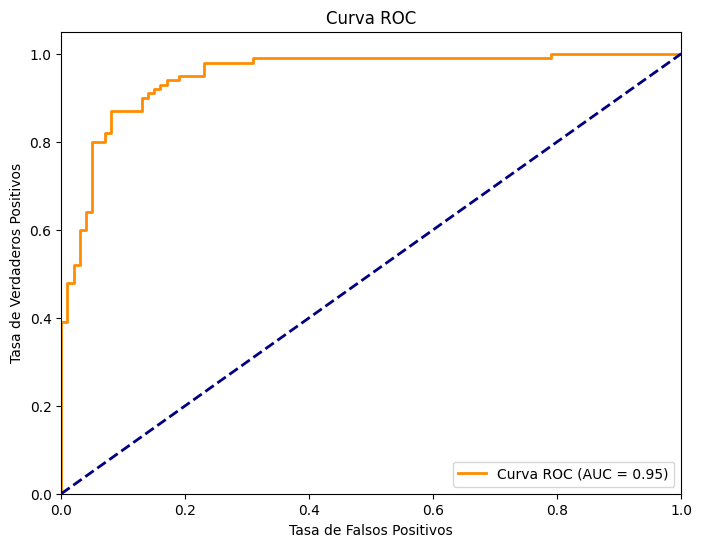

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Realiza predicciones en los datos de prueba
y_pred = model.predict(Xtest)

# Calcula el valor de AUC
auc = roc_auc_score(ytest, y_pred)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(ytest, y_pred)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
plt.savefig('roc.png')


7/7 [==============================] - 0s 3ms/step


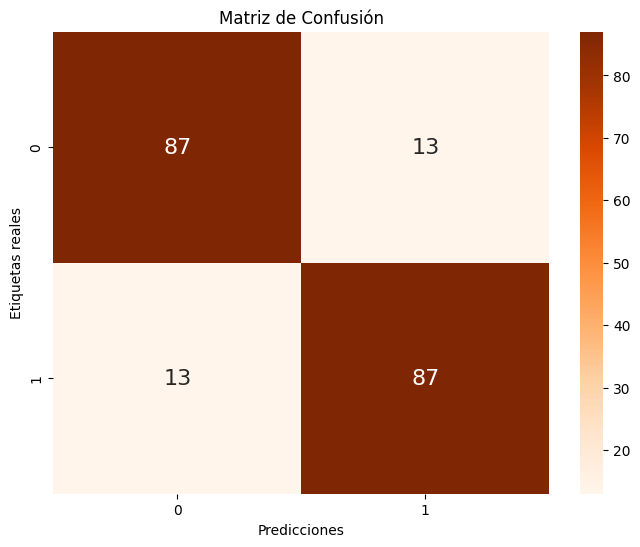

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Realiza predicciones en los datos de prueba
y_pred = model.predict(Xtest)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Calcula la matriz de confusión
confusion = confusion_matrix(ytest, y_pred_binary)

# Crea un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges', cbar=True, annot_kws={"size": 16})
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()
plt.savefig('confusion_matrix.png')

